In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Read in data

In [2]:
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv"
df = pd.read_csv(url)

In [3]:
df = df.dropna()

### Vaccine Progress of the 10 most populated states

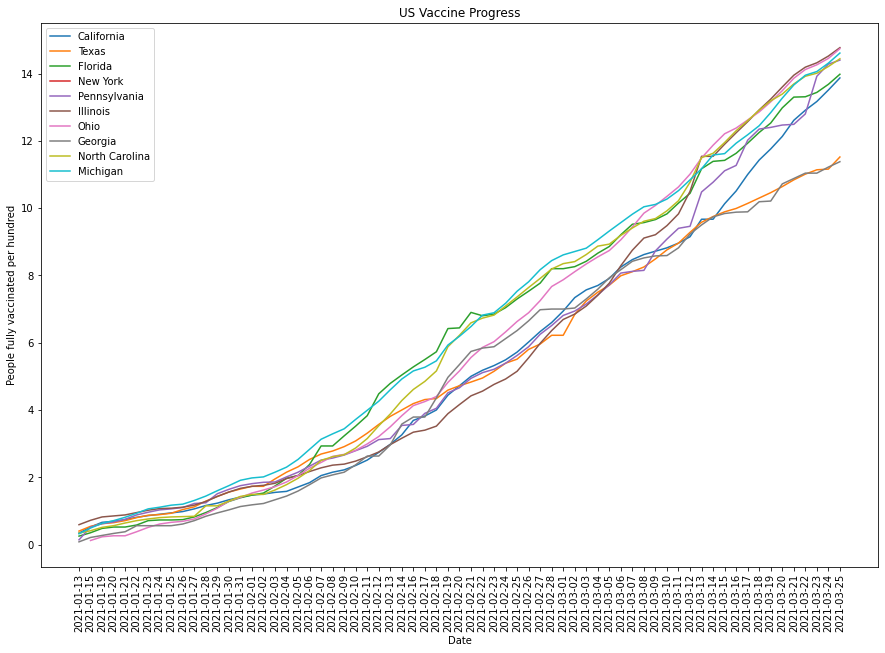

In [4]:
states = ['California', 'Texas', 'Florida', 'New York', 'Pennsylvania', 'Illinois', 'Ohio', 'Georgia', 'North Carolina', 'Michigan']

plt.figure(figsize=(15, 10))
lst = []
for state in states:
    location = df.loc[df['location'] == state]
    plt.plot(location['date'], location['people_fully_vaccinated_per_hundred'], label=state)

plt.title('US Vaccine Progress')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('People fully vaccinated per hundred')
plt.legend(loc="upper left")
plt.show()

### Number of vaccinated people in each state

In [5]:
states = df['location'].drop_duplicates()
states = states.tolist()
non_states = ['Northern Mariana Islands', 'United States', 'Marshall Islands', 'American Samoa', 'District of Columbia', 'Guam', 'Federated States of Micronesia',
             'Indian Health Svc', 'Puerto Rico', 'Republic of Palau', 'Virgin Islands']
for area in non_states:
    states.remove(area)

In [6]:
most_recent_date = df.iloc[-1]['date']

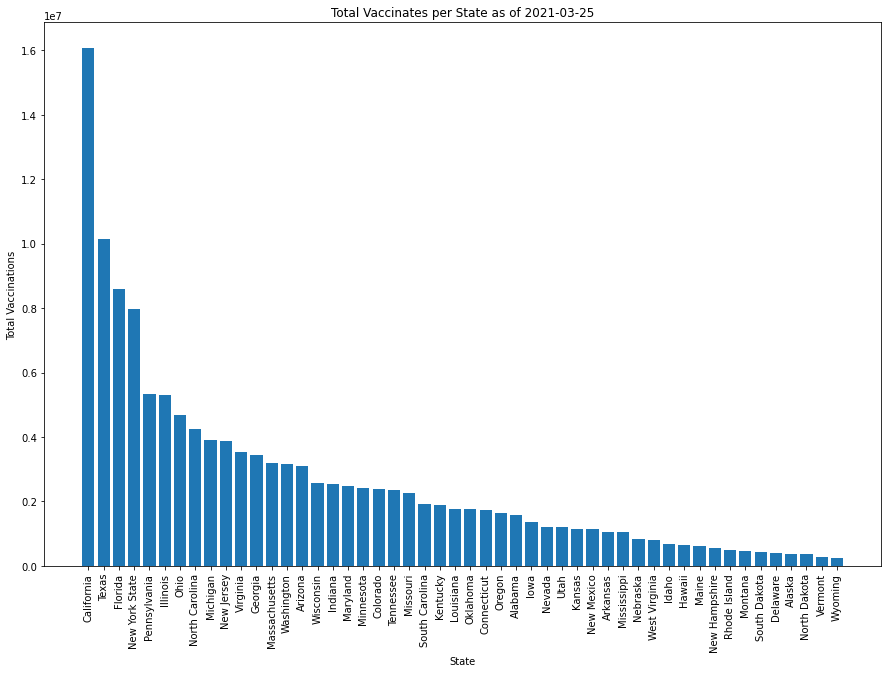

In [8]:
x = {}
for state in states:
    location = df.loc[df['location'] == state]
    row = location.iloc[-1]
    x[state] = row['total_vaccinations']
    
states = sorted(x, key=x.get, reverse=True)
plt.figure(figsize=(15, 10))
plt.bar(x.keys(), x.values())
plt.xticks(rotation=90)
plt.title(f'Total Vaccinates per State as of {most_recent_date}')
plt.xlabel('State')
plt.ylabel('Total Vaccinations')
plt.show()